In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re
import squarify

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings("ignore")

In [2]:
ecom = pd.read_excel('~hyojun/Desktop/uchicago/MSCA 31015 Data Science for Consulting/Modules/Module 9/Final Assignment - Week 9.xlsx').drop(columns = ['Unnamed: 66','Unnamed: 67','Dear Greg,'])
ecom.head()

,id,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,Fpsychology9,Flinguistics10,Fart12,Fmusic14,Ffacsimile17,Fhistory19,Fconthist20,Feconomy21,Fpolitics22,Fscience23,Fcompsci26,Frailroads27,Fmaps30,Ftravelguides31,Fhealth35,Fcooking36,Flearning37,FGamesRiddles38,Fsports39,Fhobby40,Fnature41,Fencyclopaedia44,Fvideos50,Fnonbooks99,Mfiction1,Mclassics3,Mcartoons5,Mlegends6,Mphilosophy7,Mreligion8,Mpsychology9,Mlinguistics10,Mart12,Mmusic14,Mfacsimile17,Mhistory19,Mconthist20,Meconomy21,Mpolitics22,Mscience23,Mcompsci26,Mrailroads27,Mmaps30,Mtravelguides31,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
0,914,NaN,194,7,318.894775,1703,1,0,1,0,0,0,0,0,1,7,0,0,17,0,0,0,0,0,0,2,2,1,0,0,0,0,0,0,0,0,5.949997,0.0,7.643810,0.0,0.00000,0.000000,0.0,0.000000,8.589699,61.429962,0.0,0.000000,197.935547,0.000000,0.0,0.000000,0.000000,0.000000,0.0,12.271004,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,957,NaN,3,14,368.052246,2364,1,0,2,0,0,0,0,0,0,4,0,4,4,0,0,0,1,0,0,0,7,0,4,0,0,4,2,1,0,0,12.680038,0.0,20.236496,0.0,0.00000,0.000000,0.0,0.000000,0.000000,29.414169,0.0,53.839020,60.749969,0.000000,0.0,0.000000,5.899998,0.000000,0.0,0.000000,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
2,1406,NaN,1489,15,423.298340,2371,0,0,0,0,0,0,0,0,0,0,0,1,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,10.123573,413.174805,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,1414,NaN,155,4,71.217041,1290,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,71.217041,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,1546,NaN,194,6,442.638184,2188,0,0,1,0,3,1,0,1,1,3,0,6,7,1,0,2,0,2,0,1,3,0,2,0,0,2,0,0,3,0,0.000000,0.0,8.899994,0.0,26.19841,19.899994,0.0,6.621227,15.313187,39.804047,0.0,64.744934,86.945740,5.112919,0.0,19.849991,0.000000,9.960655,0.0,10.123573,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0


1. Perform descriptive statistics on all variables to help understand the data, the distributions and basic info you have to work with on this challenge. (Mean, Standard Deviation, Median, Min, Max and Histogram)

In [3]:
ecom.dtypes

id                    int64
logtarg             float64
r                     int64
f                     int64
m                   float64
tof                   int64
Ffiction1             int64
Fclassics3            int64
Fcartoons5            int64
Flegends6             int64
Fphilosophy7          int64
Freligion8            int64
Fpsychology9          int64
Flinguistics10        int64
Fart12                int64
Fmusic14              int64
Ffacsimile17          int64
Fhistory19            int64
Fconthist20           int64
Feconomy21            int64
Fpolitics22           int64
Fscience23            int64
Fcompsci26            int64
Frailroads27          int64
Fmaps30               int64
Ftravelguides31       int64
Fhealth35             int64
Fcooking36            int64
Flearning37           int64
FGamesRiddles38       int64
Fsports39             int64
Fhobby40              int64
Fnature41             int64
Fencyclopaedia44      int64
Fvideos50             int64
Fnonbooks99         

In [4]:
ecom.describe()

,id,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,Fpsychology9,Flinguistics10,Fart12,Fmusic14,Ffacsimile17,Fhistory19,Fconthist20,Feconomy21,Fpolitics22,Fscience23,Fcompsci26,Frailroads27,Fmaps30,Ftravelguides31,Fhealth35,Fcooking36,Flearning37,FGamesRiddles38,Fsports39,Fhobby40,Fnature41,Fencyclopaedia44,Fvideos50,Fnonbooks99,Mfiction1,Mclassics3,Mcartoons5,Mlegends6,Mphilosophy7,Mreligion8,Mpsychology9,Mlinguistics10,Mart12,Mmusic14,Mfacsimile17,Mhistory19,Mconthist20,Meconomy21,Mpolitics22,Mscience23,Mcompsci26,Mrailroads27,Mmaps30,Mtravelguides31,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
count,3.371300e+04,8311.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.00000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000
mean,8.234209e+06,0.130050,508.427254,5.820603,251.924325,1296.088186,0.590900,0.228102,0.356480,0.104767,0.290659,0.980957,0.046570,0.203215,0.608549,2.320974,0.050960,2.647940,2.153947,0.208377,0.029959,0.410791,0.150862,0.187020,0.074986,1.484976,2.109898,0.425444,0.61718,0.034497,0.001809,0.637736,0.317237,0.480912,0.407617,0.463174,5.191555,3.909188,2.493460,1.249562,3.806866,16.368536,0.716569,2.214243,10.756127,29.261677,3.694856,39.064488,24.951676,2.015893,0.315122,4.861522,1.328445,2.103172,1.456697,14.634508,29.095301,4.223431,21.147507,0.305226,0.020681,6.785558,3.728635,8.402428,6.020431,1.800973
std,4.426015e+06,0.659962,542.440039,7.008049,3929.929826,818.976321,1.762201,0.865510,1.105653,0.527764,1.088606,3.112212,0.262156,0.641489,1.884077,6.681362,0.398608,5.930653,5.989002,0.755520,0.190992,1.480713,0.596788,0.974306,0.335845,4.368954,5.340294,1.695695,1.64184,0.207741,0.043191,1.723662,1.049727,1.253211,1.306615,1.447000,17.670335,28.864567,8.444797,8.180311,18.350047,797.146228,6.795593,9.197459,38.383837,1377.712988,90.674547,95.897338,71.814323,8.020535,2.206537,19.315840,5.783000,10.894953,10.671295,44.685317,2087.221131,19.975164,2898.452008,1.991675,0.501499,21.197488,15.007592,46.021881,19.643978,21.383867
min,9.140000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.391616e+06,0.000000,117.000000,1.000000,39.899994,536.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [5]:
ecom['targ'] = 10**(ecom['logtarg'])
ecom.head()

,id,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,Fpsychology9,Flinguistics10,Fart12,Fmusic14,Ffacsimile17,Fhistory19,Fconthist20,Feconomy21,Fpolitics22,Fscience23,Fcompsci26,Frailroads27,Fmaps30,Ftravelguides31,Fhealth35,Fcooking36,Flearning37,FGamesRiddles38,Fsports39,Fhobby40,Fnature41,Fencyclopaedia44,Fvideos50,Fnonbooks99,Mfiction1,Mclassics3,Mcartoons5,Mlegends6,Mphilosophy7,Mreligion8,Mpsychology9,Mlinguistics10,Mart12,Mmusic14,Mfacsimile17,Mhistory19,Mconthist20,Meconomy21,Mpolitics22,Mscience23,Mcompsci26,Mrailroads27,Mmaps30,Mtravelguides31,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99,targ
0,914,NaN,194,7,318.894775,1703,1,0,1,0,0,0,0,0,1,7,0,0,17,0,0,0,0,0,0,2,2,1,0,0,0,0,0,0,0,0,5.949997,0.0,7.643810,0.0,0.00000,0.000000,0.0,0.000000,8.589699,61.429962,0.0,0.000000,197.935547,0.000000,0.0,0.000000,0.000000,0.000000,0.0,12.271004,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN
1,957,NaN,3,14,368.052246,2364,1,0,2,0,0,0,0,0,0,4,0,4,4,0,0,0,1,0,0,0,7,0,4,0,0,4,2,1,0,0,12.680038,0.0,20.236496,0.0,0.00000,0.000000,0.0,0.000000,0.000000,29.414169,0.0,53.839020,60.749969,0.000000,0.0,0.000000,5.899998,0.000000,0.0,0.000000,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0,NaN
2,1406,NaN,1489,15,423.298340,2371,0,0,0,0,0,0,0,0,0,0,0,1,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,10.123573,413.174805,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN
3,1414,NaN,155,4,71.217041,1290,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,71.217041,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN
4,1546,NaN,194,6,442.638184,2188,0,0,1,0,3,1,0,1,1,3,0,6,7,1,0,2,0,2,0,1,3,0,2,0,0,2,0,0,3,0,0.000000,0.0,8.899994,0.0,26.19841,19.899994,0.0,6.621227,15.313187,39.804047,0.0,64.744934,86.945740,5.112919,0.0,19.849991,0.000000,9.960655,0.0,10.123573,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0,NaN


In [6]:
ecom.isnull().sum()

id                      0
logtarg             25402
r                       0
f                       0
m                       0
tof                     0
Ffiction1               0
Fclassics3              0
Fcartoons5              0
Flegends6               0
Fphilosophy7            0
Freligion8              0
Fpsychology9            0
Flinguistics10          0
Fart12                  0
Fmusic14                0
Ffacsimile17            0
Fhistory19              0
Fconthist20             0
Feconomy21              0
Fpolitics22             0
Fscience23              0
Fcompsci26              0
Frailroads27            0
Fmaps30                 0
Ftravelguides31         0
Fhealth35               0
Fcooking36              0
Flearning37             0
FGamesRiddles38         0
Fsports39               0
Fhobby40                0
Fnature41               0
Fencyclopaedia44        0
Fvideos50               0
Fnonbooks99             0
Mfiction1               0
Mclassics3              0
Mcartoons5  

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'logtarg'}>,
        <AxesSubplot:title={'center':'r'}>,
        <AxesSubplot:title={'center':'f'}>,
        <AxesSubplot:title={'center':'m'}>,
        <AxesSubplot:title={'center':'tof'}>,
        <AxesSubplot:title={'center':'Ffiction1'}>,
        <AxesSubplot:title={'center':'Fclassics3'}>],
       [<AxesSubplot:title={'center':'Fcartoons5'}>,
        <AxesSubplot:title={'center':'Flegends6'}>,
        <AxesSubplot:title={'center':'Fphilosophy7'}>,
        <AxesSubplot:title={'center':'Freligion8'}>,
        <AxesSubplot:title={'center':'Fpsychology9'}>,
        <AxesSubplot:title={'center':'Flinguistics10'}>,
        <AxesSubplot:title={'center':'Fart12'}>,
        <AxesSubplot:title={'center':'Fmusic14'}>],
       [<AxesSubplot:title={'center':'Ffacsimile17'}>,
        <AxesSubplot:title={'center':'Fhistory19'}>,
        <AxesSubplot:title={'center':'Fconthist20'}>,
        <AxesSubplot:title={'cent

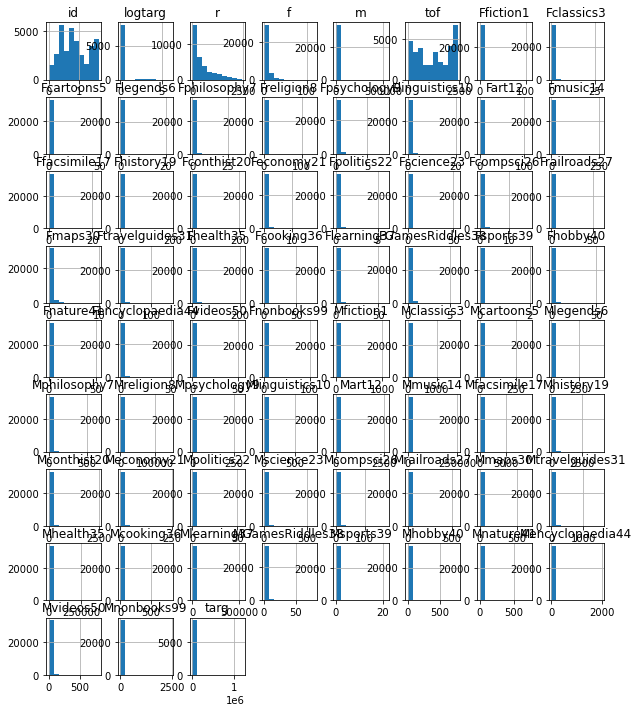

In [7]:
ecom.hist(figsize=(10,12))

array([[<AxesSubplot:title={'center':'r'}>,
        <AxesSubplot:title={'center':'f'}>],
       [<AxesSubplot:title={'center':'m'}>,
        <AxesSubplot:title={'center':'tof'}>]], dtype=object)

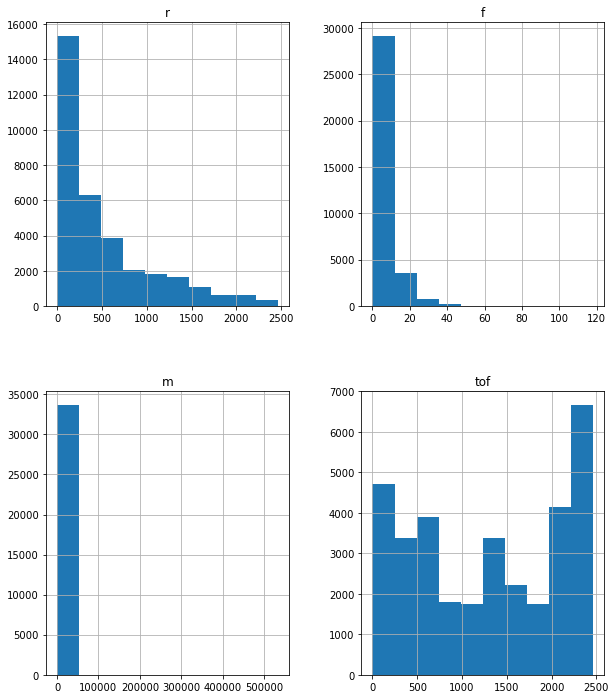

In [8]:
ecom[['r','f','m','tof']].hist(figsize=(10,12))

<AxesSubplot:xlabel='m'>

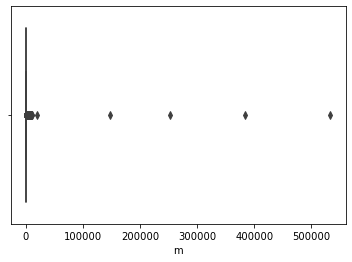

In [9]:
sns.boxplot(x=ecom['m'])

array([[<AxesSubplot:title={'center':'Ffiction1'}>,
        <AxesSubplot:title={'center':'Fclassics3'}>,
        <AxesSubplot:title={'center':'Fcartoons5'}>,
        <AxesSubplot:title={'center':'Flegends6'}>,
        <AxesSubplot:title={'center':'Fphilosophy7'}>],
       [<AxesSubplot:title={'center':'Freligion8'}>,
        <AxesSubplot:title={'center':'Fpsychology9'}>,
        <AxesSubplot:title={'center':'Flinguistics10'}>,
        <AxesSubplot:title={'center':'Fart12'}>,
        <AxesSubplot:title={'center':'Fmusic14'}>],
       [<AxesSubplot:title={'center':'Ffacsimile17'}>,
        <AxesSubplot:title={'center':'Fhistory19'}>,
        <AxesSubplot:title={'center':'Fconthist20'}>,
        <AxesSubplot:title={'center':'Feconomy21'}>,
        <AxesSubplot:title={'center':'Fpolitics22'}>],
       [<AxesSubplot:title={'center':'Fscience23'}>,
        <AxesSubplot:title={'center':'Fcompsci26'}>,
        <AxesSubplot:title={'center':'Frailroads27'}>,
        <AxesSubplot:title={'center':

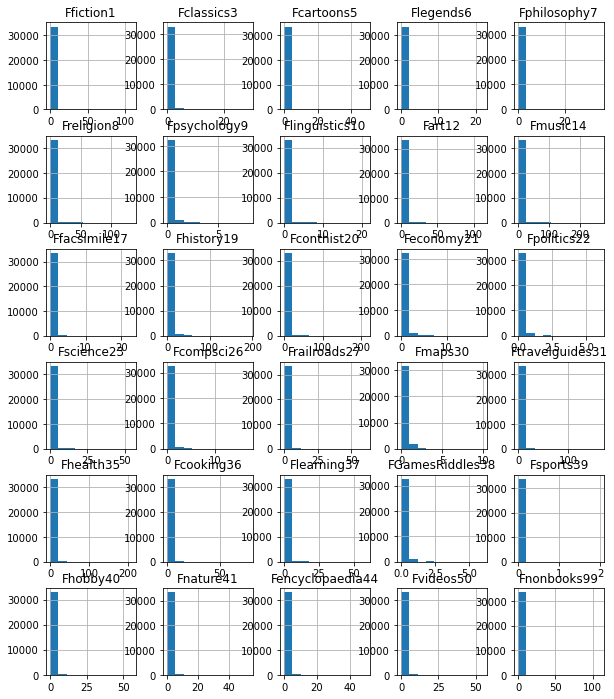

In [10]:
f_cols = [col for col in ecom if col.startswith('F')]
ecom[f_cols].hist(figsize=(10,12))

array([[<AxesSubplot:title={'center':'Mfiction1'}>,
        <AxesSubplot:title={'center':'Mclassics3'}>,
        <AxesSubplot:title={'center':'Mcartoons5'}>,
        <AxesSubplot:title={'center':'Mlegends6'}>,
        <AxesSubplot:title={'center':'Mphilosophy7'}>],
       [<AxesSubplot:title={'center':'Mreligion8'}>,
        <AxesSubplot:title={'center':'Mpsychology9'}>,
        <AxesSubplot:title={'center':'Mlinguistics10'}>,
        <AxesSubplot:title={'center':'Mart12'}>,
        <AxesSubplot:title={'center':'Mmusic14'}>],
       [<AxesSubplot:title={'center':'Mfacsimile17'}>,
        <AxesSubplot:title={'center':'Mhistory19'}>,
        <AxesSubplot:title={'center':'Mconthist20'}>,
        <AxesSubplot:title={'center':'Meconomy21'}>,
        <AxesSubplot:title={'center':'Mpolitics22'}>],
       [<AxesSubplot:title={'center':'Mscience23'}>,
        <AxesSubplot:title={'center':'Mcompsci26'}>,
        <AxesSubplot:title={'center':'Mrailroads27'}>,
        <AxesSubplot:title={'center':

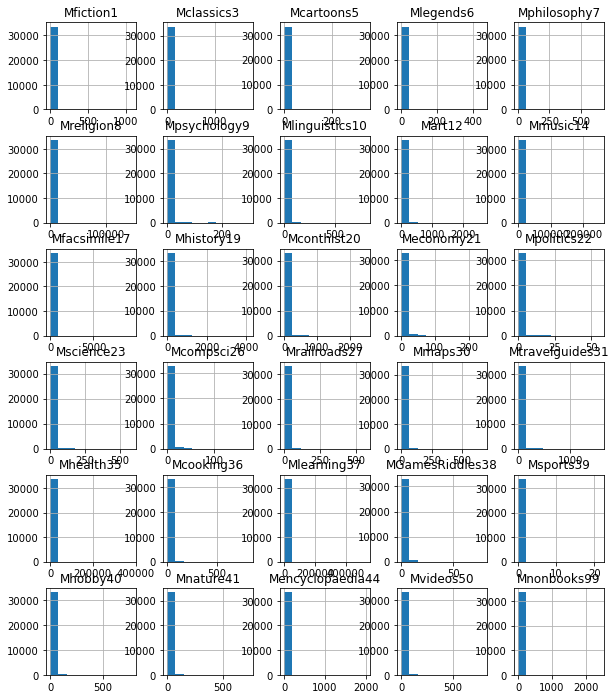

In [11]:
m_cols = [col for col in ecom if col.startswith('M')]
ecom[m_cols].hist(figsize=(10,12))

2. Create a new data set with more descriptive labels and the data needed for analysis

In [12]:
def remove_outliers(df, columns):
    int_df = df
    for x in int_df[columns]:
        int_df = int_df[int_df[x] < df[x].quantile(0.99)]
    return int_df

In [13]:
features = ecom.drop(columns = ['id', 'logtarg', 'targ']).columns
features

Index(['r', 'f', 'm', 'tof', 'Ffiction1', 'Fclassics3', 'Fcartoons5',
       'Flegends6', 'Fphilosophy7', 'Freligion8', 'Fpsychology9',
       'Flinguistics10', 'Fart12', 'Fmusic14', 'Ffacsimile17', 'Fhistory19',
       'Fconthist20', 'Feconomy21', 'Fpolitics22', 'Fscience23', 'Fcompsci26',
       'Frailroads27', 'Fmaps30', 'Ftravelguides31', 'Fhealth35', 'Fcooking36',
       'Flearning37', 'FGamesRiddles38', 'Fsports39', 'Fhobby40', 'Fnature41',
       'Fencyclopaedia44', 'Fvideos50', 'Fnonbooks99', 'Mfiction1',
       'Mclassics3', 'Mcartoons5', 'Mlegends6', 'Mphilosophy7', 'Mreligion8',
       'Mpsychology9', 'Mlinguistics10', 'Mart12', 'Mmusic14', 'Mfacsimile17',
       'Mhistory19', 'Mconthist20', 'Meconomy21', 'Mpolitics22', 'Mscience23',
       'Mcompsci26', 'Mrailroads27', 'Mmaps30', 'Mtravelguides31', 'Mhealth35',
       'Mcooking36', 'Mlearning37', 'MGamesRiddles38', 'Msports39', 'Mhobby40',
       'Mnature41', 'Mencyclopaedia44', 'Mvideos50', 'Mnonbooks99'],
      dtype='obj

In [14]:
ecom2 = remove_outliers(ecom, ['r','f','m'])
ecom2.head()

,id,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,Fpsychology9,Flinguistics10,Fart12,Fmusic14,Ffacsimile17,Fhistory19,Fconthist20,Feconomy21,Fpolitics22,Fscience23,Fcompsci26,Frailroads27,Fmaps30,Ftravelguides31,Fhealth35,Fcooking36,Flearning37,FGamesRiddles38,Fsports39,Fhobby40,Fnature41,Fencyclopaedia44,Fvideos50,Fnonbooks99,Mfiction1,Mclassics3,Mcartoons5,Mlegends6,Mphilosophy7,Mreligion8,Mpsychology9,Mlinguistics10,Mart12,Mmusic14,Mfacsimile17,Mhistory19,Mconthist20,Meconomy21,Mpolitics22,Mscience23,Mcompsci26,Mrailroads27,Mmaps30,Mtravelguides31,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99,targ
0,914,NaN,194,7,318.894775,1703,1,0,1,0,0,0,0,0,1,7,0,0,17,0,0,0,0,0,0,2,2,1,0,0,0,0,0,0,0,0,5.949997,0.0,7.643810,0.0,0.00000,0.000000,0.0,0.000000,8.589699,61.429962,0.0,0.000000,197.935547,0.000000,0.0,0.000000,0.000000,0.000000,0.0,12.271004,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN
1,957,NaN,3,14,368.052246,2364,1,0,2,0,0,0,0,0,0,4,0,4,4,0,0,0,1,0,0,0,7,0,4,0,0,4,2,1,0,0,12.680038,0.0,20.236496,0.0,0.00000,0.000000,0.0,0.000000,0.000000,29.414169,0.0,53.839020,60.749969,0.000000,0.0,0.000000,5.899998,0.000000,0.0,0.000000,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0,NaN
2,1406,NaN,1489,15,423.298340,2371,0,0,0,0,0,0,0,0,0,0,0,1,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,10.123573,413.174805,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN
3,1414,NaN,155,4,71.217041,1290,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,71.217041,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN
4,1546,NaN,194,6,442.638184,2188,0,0,1,0,3,1,0,1,1,3,0,6,7,1,0,2,0,2,0,1,3,0,2,0,0,2,0,0,3,0,0.000000,0.0,8.899994,0.0,26.19841,19.899994,0.0,6.621227,15.313187,39.804047,0.0,64.744934,86.945740,5.112919,0.0,19.849991,0.000000,9.960655,0.0,10.123573,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0,NaN


In [15]:
ecom2.head()

,id,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,Fpsychology9,Flinguistics10,Fart12,Fmusic14,Ffacsimile17,Fhistory19,Fconthist20,Feconomy21,Fpolitics22,Fscience23,Fcompsci26,Frailroads27,Fmaps30,Ftravelguides31,Fhealth35,Fcooking36,Flearning37,FGamesRiddles38,Fsports39,Fhobby40,Fnature41,Fencyclopaedia44,Fvideos50,Fnonbooks99,Mfiction1,Mclassics3,Mcartoons5,Mlegends6,Mphilosophy7,Mreligion8,Mpsychology9,Mlinguistics10,Mart12,Mmusic14,Mfacsimile17,Mhistory19,Mconthist20,Meconomy21,Mpolitics22,Mscience23,Mcompsci26,Mrailroads27,Mmaps30,Mtravelguides31,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99,targ
0,914,NaN,194,7,318.894775,1703,1,0,1,0,0,0,0,0,1,7,0,0,17,0,0,0,0,0,0,2,2,1,0,0,0,0,0,0,0,0,5.949997,0.0,7.643810,0.0,0.00000,0.000000,0.0,0.000000,8.589699,61.429962,0.0,0.000000,197.935547,0.000000,0.0,0.000000,0.000000,0.000000,0.0,12.271004,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN
1,957,NaN,3,14,368.052246,2364,1,0,2,0,0,0,0,0,0,4,0,4,4,0,0,0,1,0,0,0,7,0,4,0,0,4,2,1,0,0,12.680038,0.0,20.236496,0.0,0.00000,0.000000,0.0,0.000000,0.000000,29.414169,0.0,53.839020,60.749969,0.000000,0.0,0.000000,5.899998,0.000000,0.0,0.000000,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0,NaN
2,1406,NaN,1489,15,423.298340,2371,0,0,0,0,0,0,0,0,0,0,0,1,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,10.123573,413.174805,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN
3,1414,NaN,155,4,71.217041,1290,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,71.217041,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN
4,1546,NaN,194,6,442.638184,2188,0,0,1,0,3,1,0,1,1,3,0,6,7,1,0,2,0,2,0,1,3,0,2,0,0,2,0,0,3,0,0.000000,0.0,8.899994,0.0,26.19841,19.899994,0.0,6.621227,15.313187,39.804047,0.0,64.744934,86.945740,5.112919,0.0,19.849991,0.000000,9.960655,0.0,10.123573,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0,NaN


In [16]:
print(len(ecom2))
print(len(ecom))

32831
33713


In [17]:
ecom2 = ecom2.drop(columns = ['logtarg', 'targ']).rename(columns={"r": "Recency", "f": "Frequency", "m" : "Monetary", "tof" : "Time on File"})
ecom2.head()

,id,Recency,Frequency,Monetary,Time on File,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,Fpsychology9,Flinguistics10,Fart12,Fmusic14,Ffacsimile17,Fhistory19,Fconthist20,Feconomy21,Fpolitics22,Fscience23,Fcompsci26,Frailroads27,Fmaps30,Ftravelguides31,Fhealth35,Fcooking36,Flearning37,FGamesRiddles38,Fsports39,Fhobby40,Fnature41,Fencyclopaedia44,Fvideos50,Fnonbooks99,Mfiction1,Mclassics3,Mcartoons5,Mlegends6,Mphilosophy7,Mreligion8,Mpsychology9,Mlinguistics10,Mart12,Mmusic14,Mfacsimile17,Mhistory19,Mconthist20,Meconomy21,Mpolitics22,Mscience23,Mcompsci26,Mrailroads27,Mmaps30,Mtravelguides31,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
0,914,194,7,318.894775,1703,1,0,1,0,0,0,0,0,1,7,0,0,17,0,0,0,0,0,0,2,2,1,0,0,0,0,0,0,0,0,5.949997,0.0,7.643810,0.0,0.00000,0.000000,0.0,0.000000,8.589699,61.429962,0.0,0.000000,197.935547,0.000000,0.0,0.000000,0.000000,0.000000,0.0,12.271004,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,957,3,14,368.052246,2364,1,0,2,0,0,0,0,0,0,4,0,4,4,0,0,0,1,0,0,0,7,0,4,0,0,4,2,1,0,0,12.680038,0.0,20.236496,0.0,0.00000,0.000000,0.0,0.000000,0.000000,29.414169,0.0,53.839020,60.749969,0.000000,0.0,0.000000,5.899998,0.000000,0.0,0.000000,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
2,1406,1489,15,423.298340,2371,0,0,0,0,0,0,0,0,0,0,0,1,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,10.123573,413.174805,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,1414,155,4,71.217041,1290,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,71.217041,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,1546,194,6,442.638184,2188,0,0,1,0,3,1,0,1,1,3,0,6,7,1,0,2,0,2,0,1,3,0,2,0,0,2,0,0,3,0,0.000000,0.0,8.899994,0.0,26.19841,19.899994,0.0,6.621227,15.313187,39.804047,0.0,64.744934,86.945740,5.112919,0.0,19.849991,0.000000,9.960655,0.0,10.123573,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0


In [18]:
#ecom2.columns = ecom2.columns.str.replace(r'\d+', '')
#ecom2.head()

In [19]:
f_cols2 = ecom2[f_cols].columns.str.replace("F", "Count_")
m_cols2 = ecom2[m_cols].columns.str.replace("M", "Sales_")
f_cols2

Index(['Count_fiction1', 'Count_classics3', 'Count_cartoons5',
       'Count_legends6', 'Count_philosophy7', 'Count_religion8',
       'Count_psychology9', 'Count_linguistics10', 'Count_art12',
       'Count_music14', 'Count_facsimile17', 'Count_history19',
       'Count_conthist20', 'Count_economy21', 'Count_politics22',
       'Count_science23', 'Count_compsci26', 'Count_railroads27',
       'Count_maps30', 'Count_travelguides31', 'Count_health35',
       'Count_cooking36', 'Count_learning37', 'Count_GamesRiddles38',
       'Count_sports39', 'Count_hobby40', 'Count_nature41',
       'Count_encyclopaedia44', 'Count_videos50', 'Count_nonbooks99'],
      dtype='object')

In [20]:
ecom2.columns

Index(['id', 'Recency', 'Frequency', 'Monetary', 'Time on File', 'Ffiction1',
       'Fclassics3', 'Fcartoons5', 'Flegends6', 'Fphilosophy7', 'Freligion8',
       'Fpsychology9', 'Flinguistics10', 'Fart12', 'Fmusic14', 'Ffacsimile17',
       'Fhistory19', 'Fconthist20', 'Feconomy21', 'Fpolitics22', 'Fscience23',
       'Fcompsci26', 'Frailroads27', 'Fmaps30', 'Ftravelguides31', 'Fhealth35',
       'Fcooking36', 'Flearning37', 'FGamesRiddles38', 'Fsports39', 'Fhobby40',
       'Fnature41', 'Fencyclopaedia44', 'Fvideos50', 'Fnonbooks99',
       'Mfiction1', 'Mclassics3', 'Mcartoons5', 'Mlegends6', 'Mphilosophy7',
       'Mreligion8', 'Mpsychology9', 'Mlinguistics10', 'Mart12', 'Mmusic14',
       'Mfacsimile17', 'Mhistory19', 'Mconthist20', 'Meconomy21',
       'Mpolitics22', 'Mscience23', 'Mcompsci26', 'Mrailroads27', 'Mmaps30',
       'Mtravelguides31', 'Mhealth35', 'Mcooking36', 'Mlearning37',
       'MGamesRiddles38', 'Msports39', 'Mhobby40', 'Mnature41',
       'Mencyclopaedia44', 'M

In [21]:
new_cols = ['id', 'Recency', 'Frequency', 'Monetary', 'Time on File'] + f_cols2.tolist() + m_cols2.tolist()
ecom2.columns = new_cols

In [22]:
ecom2.columns = ecom2.columns.str.replace(r'\d+', '')

In [23]:
ecom2.head()

,id,Recency,Frequency,Monetary,Time on File,Count_fiction,Count_classics,Count_cartoons,Count_legends,Count_philosophy,Count_religion,Count_psychology,Count_linguistics,Count_art,Count_music,Count_facsimile,Count_history,Count_conthist,Count_economy,Count_politics,Count_science,Count_compsci,Count_railroads,Count_maps,Count_travelguides,Count_health,Count_cooking,Count_learning,Count_GamesRiddles,Count_sports,Count_hobby,Count_nature,Count_encyclopaedia,Count_videos,Count_nonbooks,Sales_fiction,Sales_classics,Sales_cartoons,Sales_legends,Sales_philosophy,Sales_religion,Sales_psychology,Sales_linguistics,Sales_art,Sales_music,Sales_facsimile,Sales_history,Sales_conthist,Sales_economy,Sales_politics,Sales_science,Sales_compsci,Sales_railroads,Sales_maps,Sales_travelguides,Sales_health,Sales_cooking,Sales_learning,Sales_GamesRiddles,Sales_sports,Sales_hobby,Sales_nature,Sales_encyclopaedia,Sales_videos,Sales_nonbooks
0,914,194,7,318.894775,1703,1,0,1,0,0,0,0,0,1,7,0,0,17,0,0,0,0,0,0,2,2,1,0,0,0,0,0,0,0,0,5.949997,0.0,7.643810,0.0,0.00000,0.000000,0.0,0.000000,8.589699,61.429962,0.0,0.000000,197.935547,0.000000,0.0,0.000000,0.000000,0.000000,0.0,12.271004,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,957,3,14,368.052246,2364,1,0,2,0,0,0,0,0,0,4,0,4,4,0,0,0,1,0,0,0,7,0,4,0,0,4,2,1,0,0,12.680038,0.0,20.236496,0.0,0.00000,0.000000,0.0,0.000000,0.000000,29.414169,0.0,53.839020,60.749969,0.000000,0.0,0.000000,5.899998,0.000000,0.0,0.000000,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
2,1406,1489,15,423.298340,2371,0,0,0,0,0,0,0,0,0,0,0,1,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,10.123573,413.174805,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,1414,155,4,71.217041,1290,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,71.217041,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,1546,194,6,442.638184,2188,0,0,1,0,3,1,0,1,1,3,0,6,7,1,0,2,0,2,0,1,3,0,2,0,0,2,0,0,3,0,0.000000,0.0,8.899994,0.0,26.19841,19.899994,0.0,6.621227,15.313187,39.804047,0.0,64.744934,86.945740,5.112919,0.0,19.849991,0.000000,9.960655,0.0,10.123573,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0


In [24]:
ecom2.isnull().sum()

id                     0
Recency                0
Frequency              0
Monetary               0
Time on File           0
Count_fiction          0
Count_classics         0
Count_cartoons         0
Count_legends          0
Count_philosophy       0
Count_religion         0
Count_psychology       0
Count_linguistics      0
Count_art              0
Count_music            0
Count_facsimile        0
Count_history          0
Count_conthist         0
Count_economy          0
Count_politics         0
Count_science          0
Count_compsci          0
Count_railroads        0
Count_maps             0
Count_travelguides     0
Count_health           0
Count_cooking          0
Count_learning         0
Count_GamesRiddles     0
Count_sports           0
Count_hobby            0
Count_nature           0
Count_encyclopaedia    0
Count_videos           0
Count_nonbooks         0
Sales_fiction          0
Sales_classics         0
Sales_cartoons         0
Sales_legends          0
Sales_philosophy       0


3. Document the problem you will address using the SMART framework – use hypothetical data and goals for the improvement your Recommendation Engine will deliver

Specific: The consulting team's goal is to increase sales for the website by recommending the "most popular" items to all users and satisfying them when they purchase the most popular items by making intelligent data-driven decisions.

Measurable: Keep track of future/current/past sales of the most popular items to make a better decision.

Attainable: Send a short survey when customers purchase the most popular items to improve the current e-commerce system.

Realistic/Relevant: The consulting team's goal is aligning with the e-commerce company's mission in which they both improve the ecommerce company's overall quality.

Time-Bound: Follow-up meeting with the consulting team every 2 weeks  to discuss the current progress. The deadline for this goal is 6 months and extend the deadline if needed.

4. Select from a pool of titles and roles within the company to create a core team (Maximum 6-8 members) to perform the analysis and develop the pitch to your CMO. (Pool: VP Finance, Data Engineer, SVP Data Scientist, Financial Analyst, Customer Satisfaction Manager, Website Analyst, Webmaster, VP Marketing, Performance Marketing SEM/SEO Analyst, Customer Retention Manager, Marketing Manager, Customer Research Analyst, Data Visualization Specialist, Sr. Data Scientist, Marketing Analytics Manager, IT Manager for Ecommerce Data Storage, Marketing Messaging/Creative Designer, Ecommerce Financial Manager)

Core Team:

1. SVP Data Scientist: To represent the consulting team's intelligent data-driven model to the e-commerce company's board members to follow up with the consulting team's progress.

2. Data Visualization Specialist: To visualize the customer's demand as well as the consulting team's clustering data-driven models.

3. Sr. Data Scientist: To derive intelligent data-driven models that will be passed to the Data Visualization Specialist to visualize the model. Once this is done, the project will be reviewed by the SVP Data Scientist to present the progress to the board members.

4. Data Engineer: To implement the models made by the Sr. Data Scientist, the e-commerce company needs a Data Engineer. The Data Engineer will be implementing the data-driven models which will be used in production.

5. Customer Satisfaction Manager: To keep track of the e-commerce company's customers' demand and satisfaction.

6. Marketing Manager: To keep track of the customers' demand and satisfaction, the consulting team needs a Marketing Manager in order to reach out to potential customers to increase the e-commerce company's overall sales.

5. Describe the team strengths and discipline focus areas that justify your need for each person and why this talent will be necessary for your success. This justification is intended to both motivate the team members and gain support from their managers to join your team.

As I described this question in the previous question, each team member will perform their job duties and gain support from each other to increase the e-commerce company's overall sales. Since one person cannot do everything, we need the above team members to make the e-commerce company successful.

6. Choose either a “supervised” or an “unsupervised” approach to segment/cluster current customers using the data provided. You may develop a rules base algorithm to ID a customer on each new transaction and assign them to one of your segments/clusters. Create sample data (5-10 records) with synthetic data to show how a new transaction will be scored and assigned to a segment/cluster. (You can use RFM<Recency, Frequency, Monetary Value>, K-Means or other rules based approached. Your segmentation must be MECE (Mutually Exclusive, Comprehensively Exhaustive) and any record of any incoming customer must receive one score and become assigned to a single segment – even if the transaction is incomplete or abandoned prior to purchase.

In [25]:
df = ecom2.drop(columns = 'id')
df.head()

,Recency,Frequency,Monetary,Time on File,Count_fiction,Count_classics,Count_cartoons,Count_legends,Count_philosophy,Count_religion,Count_psychology,Count_linguistics,Count_art,Count_music,Count_facsimile,Count_history,Count_conthist,Count_economy,Count_politics,Count_science,Count_compsci,Count_railroads,Count_maps,Count_travelguides,Count_health,Count_cooking,Count_learning,Count_GamesRiddles,Count_sports,Count_hobby,Count_nature,Count_encyclopaedia,Count_videos,Count_nonbooks,Sales_fiction,Sales_classics,Sales_cartoons,Sales_legends,Sales_philosophy,Sales_religion,Sales_psychology,Sales_linguistics,Sales_art,Sales_music,Sales_facsimile,Sales_history,Sales_conthist,Sales_economy,Sales_politics,Sales_science,Sales_compsci,Sales_railroads,Sales_maps,Sales_travelguides,Sales_health,Sales_cooking,Sales_learning,Sales_GamesRiddles,Sales_sports,Sales_hobby,Sales_nature,Sales_encyclopaedia,Sales_videos,Sales_nonbooks
0,194,7,318.894775,1703,1,0,1,0,0,0,0,0,1,7,0,0,17,0,0,0,0,0,0,2,2,1,0,0,0,0,0,0,0,0,5.949997,0.0,7.643810,0.0,0.00000,0.000000,0.0,0.000000,8.589699,61.429962,0.0,0.000000,197.935547,0.000000,0.0,0.000000,0.000000,0.000000,0.0,12.271004,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,3,14,368.052246,2364,1,0,2,0,0,0,0,0,0,4,0,4,4,0,0,0,1,0,0,0,7,0,4,0,0,4,2,1,0,0,12.680038,0.0,20.236496,0.0,0.00000,0.000000,0.0,0.000000,0.000000,29.414169,0.0,53.839020,60.749969,0.000000,0.0,0.000000,5.899998,0.000000,0.0,0.000000,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
2,1489,15,423.298340,2371,0,0,0,0,0,0,0,0,0,0,0,1,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,10.123573,413.174805,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,155,4,71.217041,1290,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,71.217041,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,194,6,442.638184,2188,0,0,1,0,3,1,0,1,1,3,0,6,7,1,0,2,0,2,0,1,3,0,2,0,0,2,0,0,3,0,0.000000,0.0,8.899994,0.0,26.19841,19.899994,0.0,6.621227,15.313187,39.804047,0.0,64.744934,86.945740,5.112919,0.0,19.849991,0.000000,9.960655,0.0,10.123573,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0


In [26]:
train, test = train_test_split(df, test_size=0.3, random_state=123)

In [27]:
## Kmeans clustering

distortions = []
K = range(1,5)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(train)
    distortions.append(kmeanModel.inertia_)

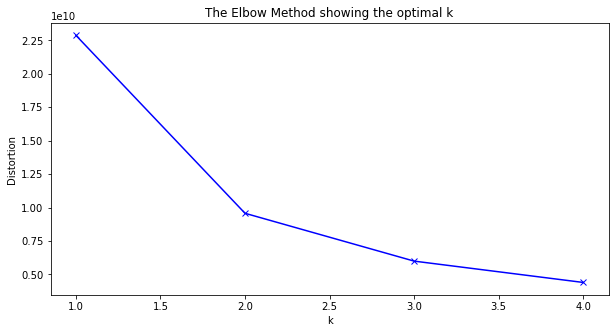

In [28]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [29]:
# 3 seems to be good
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(train)

KMeans(n_clusters=3)

In [30]:
train_Y_kmeans = kmeanModel.fit_predict(train)

In [31]:
set(train_Y_kmeans)

{0, 1, 2}

In [32]:
train_Y_kmeans

array([0, 1, 2, ..., 2, 1, 2], dtype=int32)

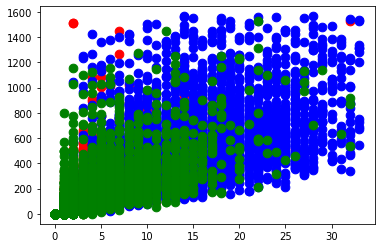

In [33]:
plt.scatter(train[train_Y_kmeans == 0]["Frequency"], train[train_Y_kmeans == 0]["Monetary"], s = 75, c = 'red')
plt.scatter(train[train_Y_kmeans == 1]["Frequency"], train[train_Y_kmeans == 1]["Monetary"], s = 75, c = 'blue')
plt.scatter(train[train_Y_kmeans == 2]["Frequency"], train[train_Y_kmeans == 2]["Monetary"], s = 75, c = 'green')

In [34]:
test_Y_kmeans = kmeanModel.predict(test)

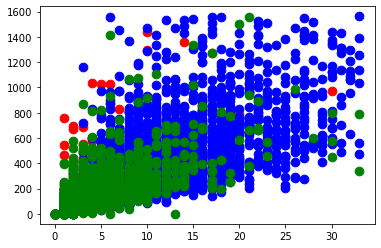

In [35]:
plt.scatter(test[test_Y_kmeans == 0]["Frequency"], test[test_Y_kmeans == 0]["Monetary"], s = 75, c = 'red')
plt.scatter(test[test_Y_kmeans == 1]["Frequency"], test[test_Y_kmeans == 1]["Monetary"], s = 75, c = 'blue')
plt.scatter(test[test_Y_kmeans == 2]["Frequency"], test[test_Y_kmeans == 2]["Monetary"], s = 75, c = 'green')

In [36]:
# Mean of all variables
train['clusters'] = train_Y_kmeans
train.groupby("clusters").mean()

,Recency,Frequency,Monetary,Time on File,Count_fiction,Count_classics,Count_cartoons,Count_legends,Count_philosophy,Count_religion,Count_psychology,Count_linguistics,Count_art,Count_music,Count_facsimile,Count_history,Count_conthist,Count_economy,Count_politics,Count_science,Count_compsci,Count_railroads,Count_maps,Count_travelguides,Count_health,Count_cooking,Count_learning,Count_GamesRiddles,Count_sports,Count_hobby,Count_nature,Count_encyclopaedia,Count_videos,Count_nonbooks,Sales_fiction,Sales_classics,Sales_cartoons,Sales_legends,Sales_philosophy,Sales_religion,Sales_psychology,Sales_linguistics,Sales_art,Sales_music,Sales_facsimile,Sales_history,Sales_conthist,Sales_economy,Sales_politics,Sales_science,Sales_compsci,Sales_railroads,Sales_maps,Sales_travelguides,Sales_health,Sales_cooking,Sales_learning,Sales_GamesRiddles,Sales_sports,Sales_hobby,Sales_nature,Sales_encyclopaedia,Sales_videos,Sales_nonbooks
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1371.866253,3.372352,124.612908,1845.035095,0.302161,0.172052,0.154505,0.058421,0.173336,0.527926,0.024395,0.158143,0.396319,0.633212,0.037877,1.501177,0.866681,0.150011,0.013482,0.221485,0.107640,0.101220,0.072544,0.968115,1.034025,0.307725,0.304943,0.009844,0.002354,0.424995,0.126899,0.294886,0.123689,0.469506,3.205283,3.773259,1.455954,0.648921,2.841972,6.540259,0.544877,2.020113,7.365974,8.566548,1.906750,23.137522,10.937665,1.653804,0.153571,2.712988,1.079102,1.249553,1.937588,10.369545,9.680895,4.511413,3.517892,0.098839,0.026631,5.146349,1.641621,5.040815,1.619293,1.227930
1,292.122656,9.929676,343.922797,1982.459326,1.012038,0.392296,0.554739,0.175241,0.491004,1.651926,0.075266,0.345920,1.012291,3.318931,0.076533,4.507096,3.523695,0.349595,0.052078,0.719716,0.273948,0.335530,0.134440,2.647871,3.567030,0.742271,0.946275,0.050177,0.003421,1.126837,0.522554,0.782945,0.520147,0.678915,8.647604,6.365157,4.054424,2.178222,6.382841,19.341670,1.010535,3.710946,17.481238,31.886570,3.606879,65.519901,41.130947,3.403555,0.545320,8.484154,2.448484,3.822547,2.224976,25.536334,29.846191,7.096031,8.734940,0.450979,0.039157,11.864388,6.006359,12.195229,7.496611,2.410634
2,257.432508,2.814420,92.174730,480.624424,0.246160,0.062500,0.210925,0.043395,0.105319,0.369528,0.024098,0.068740,0.202477,1.733967,0.011137,0.999136,1.137865,0.074213,0.013921,0.154186,0.047907,0.075845,0.020737,0.406106,1.104359,0.147945,0.387385,0.025730,0.000384,0.202189,0.177131,0.218318,0.397081,0.245968,2.011639,0.968552,1.138542,0.540114,1.155110,4.915457,0.357561,0.689477,3.563996,13.922102,0.742219,14.406321,12.362822,0.615169,0.133232,1.871897,0.317869,0.776825,0.410329,3.951498,8.709071,1.010525,2.528276,0.218414,0.005325,1.930599,2.033687,4.189691,6.040816,0.657606


In [37]:
dist = pd.DataFrame({"Count" : train.groupby("clusters").count()["Recency"]}).reset_index()
dist["Perc"] = dist['Count']/dist['Count'].sum()
dist

,clusters,Count,Perc
0,0,4673,0.203342
1,1,7892,0.343414
2,2,10416,0.453244


In [38]:
# Mean of all variables
test['clusters'] = test_Y_kmeans
test.groupby("clusters").mean()

,Recency,Frequency,Monetary,Time on File,Count_fiction,Count_classics,Count_cartoons,Count_legends,Count_philosophy,Count_religion,Count_psychology,Count_linguistics,Count_art,Count_music,Count_facsimile,Count_history,Count_conthist,Count_economy,Count_politics,Count_science,Count_compsci,Count_railroads,Count_maps,Count_travelguides,Count_health,Count_cooking,Count_learning,Count_GamesRiddles,Count_sports,Count_hobby,Count_nature,Count_encyclopaedia,Count_videos,Count_nonbooks,Sales_fiction,Sales_classics,Sales_cartoons,Sales_legends,Sales_philosophy,Sales_religion,Sales_psychology,Sales_linguistics,Sales_art,Sales_music,Sales_facsimile,Sales_history,Sales_conthist,Sales_economy,Sales_politics,Sales_science,Sales_compsci,Sales_railroads,Sales_maps,Sales_travelguides,Sales_health,Sales_cooking,Sales_learning,Sales_GamesRiddles,Sales_sports,Sales_hobby,Sales_nature,Sales_encyclopaedia,Sales_videos,Sales_nonbooks
clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1369.923115,3.413879,127.182296,1840.210185,0.308038,0.177733,0.150275,0.062406,0.188218,0.553669,0.022966,0.172242,0.367948,0.582626,0.041937,1.479281,0.930105,0.184723,0.016475,0.243135,0.105342,0.094858,0.073889,0.968048,1.142287,0.340989,0.346980,0.011483,0.000499,0.434848,0.146780,0.298053,0.127309,0.473789,2.965209,3.650250,1.339197,0.779812,3.036067,6.916838,0.394269,1.905820,7.619626,7.216412,1.539657,23.059755,11.489361,2.047659,0.230970,2.925687,1.050496,1.142525,2.089841,10.451419,11.051656,5.054194,4.043537,0.111767,0.006382,5.096480,1.822934,4.913945,1.726972,1.503575
1,286.313785,10.060459,353.861962,1990.845526,1.004534,0.388150,0.576481,0.175333,0.477630,1.738815,0.076179,0.356409,1.086457,3.571644,0.086457,4.564692,3.592201,0.366687,0.051693,0.671100,0.285369,0.349154,0.119407,2.778114,3.583132,0.678658,0.986397,0.056832,0.002418,1.155381,0.522370,0.806227,0.592503,0.679867,8.687355,5.715966,4.227527,1.941476,6.020490,21.028944,1.017068,3.882338,19.149769,33.975085,4.203803,67.006126,41.833292,3.607108,0.529165,7.659042,2.572280,3.960784,1.980324,27.018900,29.917454,6.399743,8.917634,0.511582,0.027257,12.391647,6.106914,12.335296,8.622785,2.614838
2,259.496145,2.762723,89.206127,478.155761,0.222296,0.055078,0.215686,0.038995,0.121392,0.352501,0.019828,0.065874,0.187266,1.679665,0.011236,0.993170,1.097599,0.082838,0.013880,0.147389,0.050011,0.073584,0.015863,0.403613,1.052434,0.143424,0.385107,0.024455,0.000220,0.191232,0.157964,0.233752,0.381362,0.235955,1.932617,0.882405,1.164919,0.470916,1.475955,4.428284,0.395813,0.668643,3.158499,13.856540,0.669403,14.045295,12.300890,0.673813,0.150623,1.945471,0.352820,0.739536,0.338010,3.862753,8.179589,0.965310,2.363291,0.201961,0.001751,1.659691,1.873115,3.974475,5.909292,0.564457


In [39]:
dist = pd.DataFrame({"Count" : test.groupby("clusters").count()["Recency"]}).reset_index()
dist["Perc"] = dist['Count']/dist['Count'].sum()
dist

,clusters,Count,Perc
0,0,2003,0.203350
1,1,3308,0.335838
2,2,4539,0.460812


Implement another method called RFM approach, an unsupervised learning

In [40]:
col = list(df.columns)
def relabel_data(col):
    for i in range(len(col)):
        if col[i] == 'Recency':
            col[i] = 'Recency'
        elif col[i] == 'Frequency':
            col[i] = 'Overall frequency'
        elif  col[i] == 'Monetary':
            col[i] = 'Overall monetary'
        elif  col[i] == 'Time on File':
            col[i] = 'Time on File in Days'
        elif  col[i][0] == 'F':
            col[i] = 'Frequency: ' + col[i] [1:]
            col[i] = re.sub(r'\d+', ' books', col[i]) if 'nonbooks' not in col[i] else re.sub(r'\d+', '', col[i])
        elif  col[i][0] == 'M':
            col[i] = 'Monetary: ' + col[i] [1:]
            col[i] = re.sub(r'\d+', ' books', col[i]) if 'nonbooks' not in col[i] else re.sub(r'\d+', '', col[i])

    return col
            
df.columns = relabel_data(col)   
df.head()

,Recency,Overall frequency,Overall monetary,Time on File in Days,Count_fiction,Count_classics,Count_cartoons,Count_legends,Count_philosophy,Count_religion,Count_psychology,Count_linguistics,Count_art,Count_music,Count_facsimile,Count_history,Count_conthist,Count_economy,Count_politics,Count_science,Count_compsci,Count_railroads,Count_maps,Count_travelguides,Count_health,Count_cooking,Count_learning,Count_GamesRiddles,Count_sports,Count_hobby,Count_nature,Count_encyclopaedia,Count_videos,Count_nonbooks,Sales_fiction,Sales_classics,Sales_cartoons,Sales_legends,Sales_philosophy,Sales_religion,Sales_psychology,Sales_linguistics,Sales_art,Sales_music,Sales_facsimile,Sales_history,Sales_conthist,Sales_economy,Sales_politics,Sales_science,Sales_compsci,Sales_railroads,Sales_maps,Sales_travelguides,Sales_health,Sales_cooking,Sales_learning,Sales_GamesRiddles,Sales_sports,Sales_hobby,Sales_nature,Sales_encyclopaedia,Sales_videos,Sales_nonbooks
0,194,7,318.894775,1703,1,0,1,0,0,0,0,0,1,7,0,0,17,0,0,0,0,0,0,2,2,1,0,0,0,0,0,0,0,0,5.949997,0.0,7.643810,0.0,0.00000,0.000000,0.0,0.000000,8.589699,61.429962,0.0,0.000000,197.935547,0.000000,0.0,0.000000,0.000000,0.000000,0.0,12.271004,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,3,14,368.052246,2364,1,0,2,0,0,0,0,0,0,4,0,4,4,0,0,0,1,0,0,0,7,0,4,0,0,4,2,1,0,0,12.680038,0.0,20.236496,0.0,0.00000,0.000000,0.0,0.000000,0.000000,29.414169,0.0,53.839020,60.749969,0.000000,0.0,0.000000,5.899998,0.000000,0.0,0.000000,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
2,1489,15,423.298340,2371,0,0,0,0,0,0,0,0,0,0,0,1,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,10.123573,413.174805,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,155,4,71.217041,1290,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,71.217041,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,194,6,442.638184,2188,0,0,1,0,3,1,0,1,1,3,0,6,7,1,0,2,0,2,0,1,3,0,2,0,0,2,0,0,3,0,0.000000,0.0,8.899994,0.0,26.19841,19.899994,0.0,6.621227,15.313187,39.804047,0.0,64.744934,86.945740,5.112919,0.0,19.849991,0.000000,9.960655,0.0,10.123573,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0


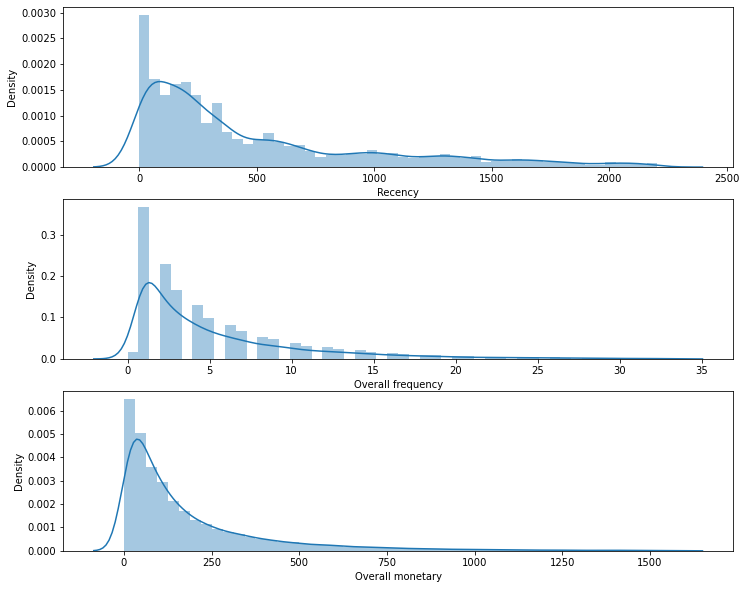

In [41]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(df['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(df['Overall frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(df['Overall monetary'])
# Show the plot
plt.show()

Since RFM is skewed to the right side, we need to group the values in quantiles. Next, we scale the data to center the mean and standard deviations.

In [42]:
# Calculate R, F and M groups
# Create labels for R and F
r_labels = range(4, 0, -1); f_labels = range(1, 5); m_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(df['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(df['Overall frequency'], q=4, labels=f_labels)
# Create new columns R and F 
df_process = df.assign(R = r_groups.values, F = f_groups.values)
# Create labels for MonetaryValue
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(df['Overall monetary'], q=4, labels=m_labels)
# Create new column M
df_process = df_process.assign(M = m_groups.values)

In [43]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
df_process['RFM_Segment_Concat'] = df_process.apply(join_rfm, axis=1)
rfm = df_process[['Recency','Overall frequency','Overall monetary',
                 'Time on File in Days','R','F','M','RFM_Segment_Concat']]
rfm.head()

,Recency,Overall frequency,Overall monetary,Time on File in Days,R,F,M,RFM_Segment_Concat
0,194,7,318.894775,1703,3,3,4,334
1,3,14,368.052246,2364,4,4,4,444
2,1489,15,423.298340,2371,1,4,4,144
3,155,4,71.217041,1290,3,3,2,332
4,194,6,442.638184,2188,3,3,4,334


In [44]:
# Count num of unique segments
rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique.sum())

61


RFM_Segment_Concat was created to have different segmentations. We need to define segments.

In [45]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
print(rfm['RFM_Score'].head())


0    10
1    12
2     9
3     8
4    10
Name: RFM_Score, dtype: int64


We first sum RFM together, then we assign different segment names on the result. When the score is high, the users are more loyal to the website.

In [46]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,Recency,Overall frequency,Overall monetary,Time on File in Days,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
0,194,7,318.894775,1703,3,3,4,334,10,Can't Loose Them
1,3,14,368.052246,2364,4,4,4,444,12,Can't Loose Them
2,1489,15,423.298340,2371,1,4,4,144,9,Can't Loose Them
3,155,4,71.217041,1290,3,3,2,332,8,Champions
4,194,6,442.638184,2188,3,3,4,334,10,Can't Loose Them


In [47]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Overall frequency': 'mean',
    'Overall monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Overall frequency Overall monetary       
                      mean              mean             mean  count
RFM_Level                                                           
Can't Loose Them     221.0              10.5            374.6  11921
Champions            436.6               4.5            161.7   3785
Loyal                575.4               3.4            111.1   3812
Needs Attention      821.2               1.2             29.6   2962
Potential            524.5               2.1             62.6   4450
Promising            678.2               1.6             43.8   4375
Require Activation  1344.7               1.0             18.6   1526


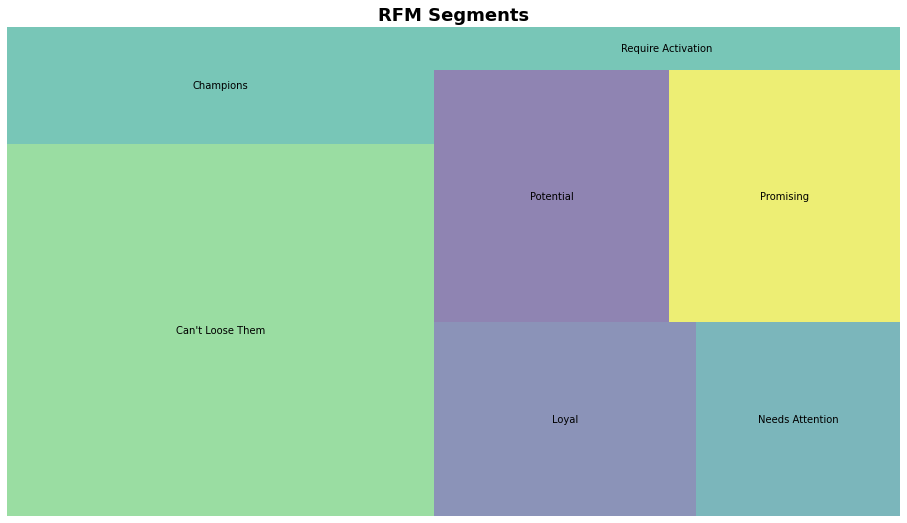

In [48]:
rfm_level_agg.columns = ['recencymean','frequencymean','monetarymean', 'count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

Feed in dummy sample data to test:

In [49]:
df_test = pd.DataFrame({'Recency':[24,136,278,699,1988],'Overall frequency':[1,2,4,6,18],'Overall monetary':[788,244,200,1768,1345]})
df_test

,Recency,Overall frequency,Overall monetary
0,24,1,788
1,136,2,244
2,278,4,200
3,699,6,1768
4,1988,18,1345


In [50]:
# Define function for RFM approach
def RFM(df):
    # Calculate R, F and M groups
    # Create labels for Recency and Frequency
    r_labels = range(4, 0, -1); f_labels = range(1, 5); m_labels = range(1, 5)
    # Assign these labels to 4 equal percentile groups 
    r_groups = pd.qcut(df['Recency'], q=4, labels=r_labels)
    # Assign these labels to 4 equal percentile groups 
    f_groups = pd.qcut(df['Overall frequency'], q=4, labels=f_labels)
    # Create new columns R and F 
    df_process = df.assign(R = r_groups.values, F = f_groups.values)
    # Create labels for MonetaryValue
    # Assign these labels to three equal percentile groups 
    m_groups = pd.qcut(df['Overall monetary'], q=4, labels=m_labels)
    # Create new column M
    df_process = df_process.assign(M = m_groups.values)
    rfm = df_process
    # Calculate RFM_Score
    rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
    # Define rfm_level function
    # Create a new variable RFM_Level
    rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
    return rfm['RFM_Level']

For the five test users, predicted results are listed below:

In [51]:
RFM(df_test)

0               Loyal
1           Potential
2           Potential
3    Can't Loose Them
4           Champions
Name: RFM_Level, dtype: object